In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import warnings
warnings.simplefilter(action="ignore")
# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

import pickle 

# Reading in data 

#### Importing original dataframes 

In [3]:
italy_17_19 = pd.read_pickle('../data/it_17_19_v50_feat.pkl')
spain_17_19 = pd.read_pickle('../data/sp_17_19_v50_feat.pkl')
greece_17_19 = pd.read_pickle('../data/gr_17_19_v50_feat.pkl')

italy_20_21 = pd.read_pickle('../data/it_20_v50_feat.pkl')
spain_20_21 = pd.read_pickle('../data/sp_20_v50_feat.pkl')
greece_20_21 = pd.read_pickle('../data/gr_20_v50_feat.pkl')

In [4]:
italy_21 = pd.read_pickle('../data/it_21_v50_feat.pkl')

In [5]:
italy_21.head(2)

,Position,Track Name,Artist,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,
2021-01-01,1,Problemas,Paris Boy,it,2aQJOc2QUTdQl1J2Z9VxYO,0.787,0.238,1,-13.154,0,0.0554,0.677,0.000022,0.0869,0.262,98.022,222892,4
2021-01-01,2,fools (can't help falling in love) (feat. Sody),Foster,it,4VEEDnEFLI9dUy5QA51rom,0.706,0.604,2,-6.932,1,0.3030,0.418,0.000000,0.2420,0.361,82.030,165029,4


In [6]:
italy_21.tail(2)

,Position,Track Name,Artist,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,
2021-02-20,49,Un sorriso dentro al pianto,Ornella Vanoni,it,1SWwL27YCzUn4Cab9NHfn8,0.607,0.450,2,-7.978,1,0.0356,0.5160,0.000019,0.114,0.237,119.642,223973,4
2021-02-20,50,Yellow Sweater,Dani,it,1Mv2VQTlPQSHBTgZbYAYSh,0.708,0.671,0,-4.899,1,0.0327,0.0171,0.000022,0.230,0.368,105.014,220857,4


#### Reading in resampled dataframes by year 

In [7]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/capstone/code'

In [8]:
it_rw_17 = pd.read_pickle("../data/resampled/it_rw_17.pkl")
it_rw_18 = pd.read_pickle("../data/resampled/it_rw_18.pkl")
it_rw_19 = pd.read_pickle("../data/resampled/it_rw_19.pkl")
it_rw_20 = pd.read_pickle("../data/resampled/it_rw_20.pkl")

In [9]:
it_rw_20.tail(2)

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2020-12-27,26.111429,0.658540,0.601163,5.225714,-7.301663,0.620000,0.099900,0.313663,0.036708,0.155573,0.494371,117.747651,190622.557143,3.894286
2021-01-03,25.948571,0.663151,0.618714,5.782857,-7.345991,0.582857,0.104829,0.309551,0.028036,0.173735,0.492659,115.925700,194482.251429,3.942857


#### Resampling 2021 DF (was not pre-processed in other notebooks)

In [10]:
it_rw_20_21 = italy_20_21.resample("W").mean()
it_rw_21 = italy_21.resample("W").mean()

In [11]:
it_rw_20_21.tail(2)

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2021-02-07,25.5,0.666561,0.634389,5.402857,-6.677991,0.680000,0.109192,0.268234,0.035348,0.223654,0.498756,119.549403,195629.388571,3.951429
2021-02-14,25.5,0.671104,0.647343,5.516667,-6.842603,0.656667,0.120716,0.277941,0.054173,0.220087,0.548739,120.591240,194515.273333,3.913333


In [12]:
it_rw_20.tail()

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2020-12-06,25.514286,0.635391,0.586877,5.448571,-8.045040,0.534286,0.109029,0.332617,0.020756,0.174773,0.451704,120.883214,198297.631429,3.951429
2020-12-13,25.865714,0.658663,0.606386,5.334286,-7.434363,0.605714,0.097016,0.330153,0.019915,0.155027,0.480546,121.218346,198129.382857,3.945714
2020-12-20,25.771429,0.649389,0.601711,5.185714,-7.288403,0.617143,0.101651,0.337039,0.018042,0.157806,0.474697,117.303751,194437.685714,3.888571
2020-12-27,26.111429,0.658540,0.601163,5.225714,-7.301663,0.620000,0.099900,0.313663,0.036708,0.155573,0.494371,117.747651,190622.557143,3.894286
2021-01-03,25.948571,0.663151,0.618714,5.782857,-7.345991,0.582857,0.104829,0.309551,0.028036,0.173735,0.492659,115.925700,194482.251429,3.942857


In [13]:
# dropping last row so can join with it_rw_21
it_rw_20.drop(it_rw_20.index[-1], inplace=True)

In [14]:
it_rw_20.tail(2)

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2020-12-20,25.771429,0.649389,0.601711,5.185714,-7.288403,0.617143,0.101651,0.337039,0.018042,0.157806,0.474697,117.303751,194437.685714,3.888571
2020-12-27,26.111429,0.658540,0.601163,5.225714,-7.301663,0.620000,0.099900,0.313663,0.036708,0.155573,0.494371,117.747651,190622.557143,3.894286


In [15]:
it_rw_21.head()

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2021-01-03,25.5,0.671520,0.632300,5.886667,-7.239080,0.546667,0.106519,0.293732,0.024474,0.166094,0.482812,114.972220,199451.313333,3.946667
2021-01-10,25.5,0.647797,0.595083,5.602857,-7.735671,0.611429,0.120629,0.333332,0.021076,0.171388,0.481609,114.757686,190786.811429,3.931429
2021-01-17,25.5,0.648654,0.575126,5.777143,-7.367766,0.591429,0.110776,0.358029,0.019525,0.186532,0.474283,115.710431,185596.828571,3.954286
2021-01-24,25.5,0.657583,0.601891,5.514286,-7.057797,0.622857,0.112212,0.363183,0.019110,0.216798,0.503386,117.861894,184245.968571,3.960000
2021-01-31,25.5,0.658066,0.605014,5.222857,-6.992654,0.648571,0.110351,0.341578,0.037043,0.217935,0.505154,116.264131,185354.448571,3.960000


In [16]:
italy_rw_20_21 = pd.concat([it_rw_20, it_rw_21])

In [17]:
italy_rw_20_21

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2020-01-05,25.500000,0.696228,0.645564,6.336000,-6.606992,0.628000,0.128064,0.228294,0.030112,0.183885,0.474768,119.054180,189219.892000,3.960000
2020-01-12,25.500000,0.668417,0.639666,5.720000,-6.622551,0.611429,0.126540,0.231547,0.032838,0.172342,0.445104,119.640874,189433.622857,3.945714
2020-01-19,25.500000,0.665220,0.638023,5.511429,-6.729686,0.594286,0.134521,0.217706,0.029346,0.168181,0.448707,121.229400,187336.380000,3.954286
2020-01-26,25.500000,0.666346,0.645289,5.831429,-6.478337,0.577143,0.134881,0.216957,0.025423,0.181263,0.467073,121.097109,191119.602857,3.951429
2020-02-02,25.500000,0.663640,0.634169,5.528571,-6.471766,0.545714,0.121164,0.226254,0.013118,0.170804,0.456720,119.053631,191601.280000,3.960000
2020-02-09,25.500000,0.662737,0.618326,5.485714,-6.989980,0.568571,0.138365,0.247561,0.010253,0.177320,0.471031,119.812763,190267.731429,3.937143
2020-02-16,25.500000,0.637031,0.628757,5.002857,-7.004491,0.651429,0.129542,0.226743,0.009887,0.174301,0.474034,121.606100,190171.537143,3.960000
2020-02-23,25.500000,0.652617,0.622089,5.374286,-7.129897,0.657143,0.125355,0.245717,0.008505,0.189401,0.469743,121.678031,185284.325714,3.980000
2020-03-01,25.500000,0.675106,0.616457,5.420000,-7.158214,0.688571,0.156197,0.238917,0.005000,0.198963,0.445149,120.733266,180434.580000,3.980000


# Importing needed functions 

_Function to create, fit, predict, and plot with ARIMA_ 

In [18]:
def arima_predict_plot(df, feature, year, title='title', figsize=(15,5), order=None, d=None, ci=True):
  
    # create train and test sets
    n_rows = round(len(df)*0.9)
    train = df[feature][0:n_rows]
    test = df[feature][n_rows:]
    
    # find ndiffs for stationarity from ndiff dataframe
    if d is None: 
        d = ndiff_df.loc[ndiff_df['audio_feature'] == feature, 'ndiffs for stationarity'].iloc[0]
    print(f'd = {d}')
    
    if order is None:
        # find order from arima parameters dataframe 
        order = param_df.loc[param_df['audio_feature'] == feature, 'order'].iloc[0]
    print(f'order = {order}')
   
    # instantiate ARIMA model
    model = ARIMA(train, order=order)

    # fit ARIMA model
    arima = model.fit()

    # get predictions for train and test sets 
    preds_train = model.predict(params=arima.params, start=train.index[d], end=train.index[-1], typ='levels')
    preds_test = model.predict(params=arima.params, start=test.index[0], end=test.index[-1], typ='levels')

    # calculate and print RMSE for train and test setes 
    train_rmse = mean_squared_error(train[d::], preds_train)**0.5
    print(f'{feature.capitalize()} train RMSE ({year}) - ARIMA({order}): {train_rmse}')

    test_rmse = mean_squared_error(test, preds_test)**0.5
    print(f'{feature.capitalize()} test RMSE ({year}) - ARIMA({order}): {test_rmse}')

    # add RMSEs to arima parameters dataframe 
#     param_df.loc[param_df['audio_feature'] == feature, 'arima_train_rmse'] = train_rmse    
#     param_df.loc[param_df['audio_feature'] == feature, 'arima_test_rmse'] = test_rmse

      # set up plot
    plt.figure(figsize=figsize)

    # plot training data 
    plt.plot(train, color='blue')

    # plot testing data 
    plt.plot(test.index, test, color='orange')

    # plot predicted values for test set 
    plt.plot(test.index, preds_test, color='green')

    # add line for the baseline model (mean value of feature)
    plt.hlines(df[feature].mean(), train.index[0], test.index[-1], color = 'grey')

    # plot confidence interval
    if ci:
        ci = 1.96 * np.std(preds_test)/np.mean(preds_test)
        plt.fill_between(test.index, (preds_test - ci), (preds_test + ci), color='blue', alpha=.1) 

    # make plot with title! 
    plt.title(title, fontsize=16)
    plt.grid()
    plt.show() ; 

_More elemental function just to instantiate and fit ARIMA model._

In [19]:
def basic_arima_model(df, feature, year, figsize=(15,5), order=None, d=None, ci=True):
  
    # create train and test sets
#     n_rows = round(len(data)*0.9)
#     train = data[0:n_rows]
#     test = data[n_rows:]
    
    # create train and test sets
    n_rows = round(len(df)*0.9)
    train = df[feature][0:n_rows]
    test = df[feature][n_rows:]
    
    print(train.index[0])
    print(train.index[-1])
    print(test.index[0])
    print(test.index[-1])
    
    # instantiate ARIMA model
    model = ARIMA(train, order=order)

    # fit ARIMA model
    arima = model.fit()

    # get predictions for train and test sets 
    preds_train = model.predict(params=arima.params, start=train.index[d], end=train.index[-1], typ='levels')
    preds_test = model.predict(params=arima.params, start=test.index[0], end=test.index[-1], typ='levels')

    # calculate and print RMSE for train and test setes 
    train_rmse = mean_squared_error(train[d::], preds_train)**0.5
    print(f'{feature.capitalize()} train RMSE ({year}) - ARIMA({order}): {train_rmse}')

    test_rmse = mean_squared_error(test, preds_test)**0.5
    print(f'{feature.capitalize()} test RMSE ({year}) - ARIMA({order}): {test_rmse}')

    return arima

_Function just to plot train/test/predictions for any model._ 

In [20]:
def arima_plot(train, test, preds_test, title='title', figsize=(15,5), ci=True):
    
    # set up plot
    plt.figure(figsize=figsize)
    
    # plot training data 
    plt.plot(train, color='blue')
    
    # plot testing data 
    plt.plot(test.index, test, color='orange')
    
    # plot predicted values for test set 
    plt.plot(test.index, preds_test, color='green')
    
    # add line for the baseline model (mean value of feature)
    # plt.hlines(df[feature].mean(), train.index[0], test.index[-1], color = 'grey')
    
    # plot confidence interval 
    if ci:
        ci = 1.96 * np.std(preds_test)/np.mean(preds_test)
        plt.fill_between(test.index, (preds_test - ci), (preds_test + ci), color='blue', alpha=.1) 
    
    # make plot with title! 
    plt.title(title, fontsize=16)
    plt.grid()
    plt.show() ; 

_Function to create, fit, predict, and plot SARIMA model with `seasonal_order` passed in but **no** exogenous features included._

In [21]:
def sarima_predict_plot_seasonal(df, feature, year, title='title', figsize=(15,5), order=None, d=None, seasonal_order=None, ci=True):
  
    # create train and test sets
    n_rows = round(len(df)*0.9)
    train = df[feature][0:n_rows]
    test = df[feature][n_rows:]
    
    print(train.index[0])
    print(train.index[-1])
    print(test.index[0])
    print(test.index[-1])
    
#     # find ndiffs for stationarity from ndiff dataframe
#     if d is None: 
#         d = ndiff_df.loc[ndiff_df['audio_feature'] == feature, 'ndiffs for stationarity'].iloc[0]
#     print(f'd = {d}')
    
#     # find order from arima parameters dataframe 
#     if order is None:
#         order = param_df.loc[param_df['audio_feature'] == feature, 'order'].iloc[0]
#     print(f'order = {order}')
    
#     # find seasonal order from arima parameters dataframe 
#     if seasonal_order is None: 
#         sea_string = param_df.loc[param_df['audio_feature'] == feature, 'seasonal_order'].iloc[0]
#         seasonal_order = tuple(map(int, sea_string.split(', '))) 
#     print(f'seasonal order = {seasonal_order}')
    

    # instantiate and fit SARIMAX model 
    sarima = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order).fit()

    # get predictions for train and test sets 
    preds_train = sarima.predict(start=train.index[d], end=train.index[-1], typ='levels')
    preds_test = sarima.predict(start=test.index[0], end=test.index[-1], typ='levels')
    
    forecast = sarima.predict(start='2021-02-21', end='2021-03-21', typ='levels')

    # calculate and print RMSE for train and test setes 
    train_rmse = mean_squared_error(train[d::], preds_train)**0.5
    print(f'{feature.capitalize()} train RMSE ({year}) - SARIMA({order}): {train_rmse}')

    test_rmse = mean_squared_error(test, preds_test)**0.5
    print(f'{feature.capitalize()} test RMSE ({year}) - SARIMA({order}): {test_rmse}')    

    # add RMSEs to arima parameters dataframe 
#         param_df.loc[param_df['audio_feature'] == feature, 'sarima_train_rmse'] = train_rmse    
#         param_df.loc[param_df['audio_feature'] == feature, 'sarima_test_rmse'] = test_rmse

    # calculate residuals
    # residuals = test - preds_test

    # set up plot
    plt.figure(figsize=figsize)

    # plot training data 
    plt.plot(train, label="Actual - Train", color='blue')

    # plot testing data 
    plt.plot(test.index, test, label="Actual - Test", color='orange')

    # plot predicted values for test set 
    plt.plot(test.index, preds_test, label="Predictions - Test", color='green')
    
    plt.plot(forecast.index, forecast, label="Future Predictions", color='red')

    # add line for the baseline model (mean value of feature)
    plt.hlines(df[feature].mean(), train.index[0], test.index[-1], color = 'grey')

    # plot confidence interval 
    if ci:
        ci = 1.96 * np.std(preds_test)/np.mean(preds_test)
        plt.fill_between(test.index, (preds_test - ci), (preds_test + ci), color='blue', alpha=.1) 

    # make plot with title! 
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend()
    plt.show() ; 


_Function to create, fit, predict, and plot SARIMAX model with `seasonal_order` and `exogenous_variables'._

In [22]:
def sarima_predict_plot_exog(df, feature, year, exog_var, title='title', figsize=(15,5), order=None, d=None, seasonal_order=None, ci=True):

#     # find ndiffs for stationarity from ndiff dataframe
#     if d is None: 
#         d = ndiff_df.loc[ndiff_df['audio_feature'] == feature, 'ndiffs for stationarity'].iloc[0]
#     print(f'd = {d}')
    
#     # find order from arima parameters dataframe 
#     if order is None:
#         order = param_df.loc[param_df['audio_feature'] == feature, 'order'].iloc[0]
#     print(f'order = {order}')
    
#     # find seasonal order from arima parameters dataframe 
#     if seasonal_order is None: 
#         sea_string = param_df.loc[param_df['audio_feature'] == feature, 'seasonal_order'].iloc[0]
#         seasonal_order = tuple(map(int, sea_string.split(', '))) 
#     print(f'seasonal order = {seasonal_order}')
    
    # reshape exogenous features to pass to the model 
    exog = df.loc[:, exog_var]   
   
    # create train and test sets
    n_rows = round(len(df)*0.9)
    train = df[feature][0:n_rows]
    test = df[feature][n_rows:]
    
    print(train.index[0])
    print(train.index[-1])
    print(test.index[0])
    print(test.index[-1])

    # instantiate and fit SARIMAX model 
    sarima = SARIMAX(endog=train, exog=exog[0:n_rows], order=order, seasonal_order=seasonal_order).fit()

    # get predictions for train and test sets 
    preds_train = sarima.predict(start=train.index[d], end=train.index[-1], typ='levels', exog=exog[0:n_rows])
    preds_test = sarima.predict(start=test.index[0], end=test.index[-1], typ='levels', exog=exog[n_rows:])

    # calculate and print RMSE for train and test setes 
    train_rmse = mean_squared_error(train[d::], preds_train)**0.5
    print(f'{feature.capitalize()} train RMSE ({year}) - SARIMAX({seasonal_order}) w/ exogenous variables: {train_rmse}')

    test_rmse = mean_squared_error(test, preds_test)**0.5
    print(f'{feature.capitalize()} test RMSE ({year}) - SARIMAX({seasonal_order}) w/ exogenous variables: {test_rmse}')    
    
#     exog_forecast = df.loc['2021-01-24':'2021-02-21'[feature]]
#     forecast = sarima.predict(start='2021-02-21', end='2021-03-21', typ='levels', exog=exog_forecast)

    # add RMSEs to arima parameters dataframe 
#     param_df.loc[param_df['audio_feature'] == feature, 'exog_train_rmse'] = train_rmse    
#     param_df.loc[param_df['audio_feature'] == feature, 'exog_test_rmse'] = test_rmse

    # calculate residuals
    # residuals = test - preds_test

    # set up plot
    plt.figure(figsize=figsize)

    # plot training data 
    plt.plot(train, label="Actual - Train", color='blue')

    # plot testing data 
    plt.plot(test.index, test, label="Actual - Test", color='orange')

    # plot predicted values for test set 
    plt.plot(test.index, preds_test, label="Predicted", color='green')
    

    # add line for the baseline model (mean value of feature)
    plt.hlines(df[feature].mean(), train.index[0], test.index[-1], color = 'grey')

    # plot confidence interval 
    if ci:
        ci = 1.96 * np.std(preds_test)/np.mean(preds_test)
        plt.fill_between(test.index, (preds_test - ci), (preds_test + ci), color='blue', alpha=.1) 

    # make plot with title! 
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend()
    plt.show() ; 


_Identifying exogenous variables for each of the five main features for use in the `sarima_predict_plot_exog` function. In this case, the exogenous variables for each audio feature are the other four audio features._

In [23]:
five_features = ['danceability', 'mode', 'acousticness', 'valence', 'energy']

exog_danceability = ['mode', 'acousticness', 'valence', 'energy']
exog_mode = ['danceability', 'acousticness', 'valence', 'energy']
exog_acousticness = ['danceability', 'mode', 'valence', 'energy']
exog_valence = ['danceability', 'mode', 'acousticness', 'energy']
exog_energy = ['danceability', 'mode', 'acousticness', 'valence']

2020-02-23 00:00:00
2021-01-17 00:00:00
2021-01-24 00:00:00
2021-02-21 00:00:00
Danceability train RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.017856047151425577
Danceability test RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.019304845192167134


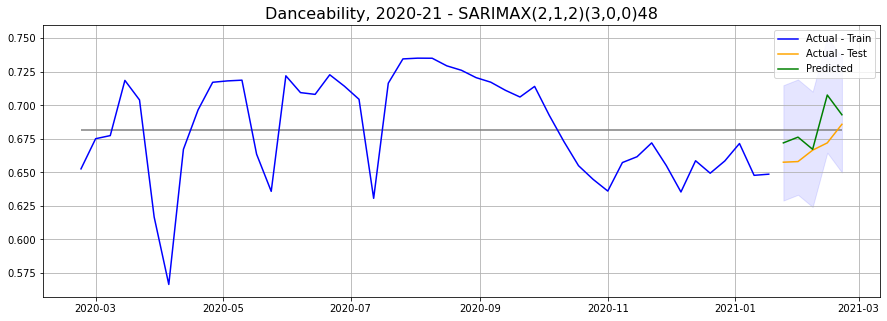

In [24]:
sarima_predict_plot_exog(italy_rw_20_21[7:], 'danceability', 2020, exog_var=exog_danceability, title='Danceability, 2020-21 - SARIMAX(2,1,2)(3,0,0)48', order=(2,1,2), d=1, seasonal_order=(3,0,0,48))

2020-02-23 00:00:00
2021-01-17 00:00:00
2021-01-24 00:00:00
2021-02-21 00:00:00
Danceability train RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.017856047151425577
Danceability test RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.019304845192167134


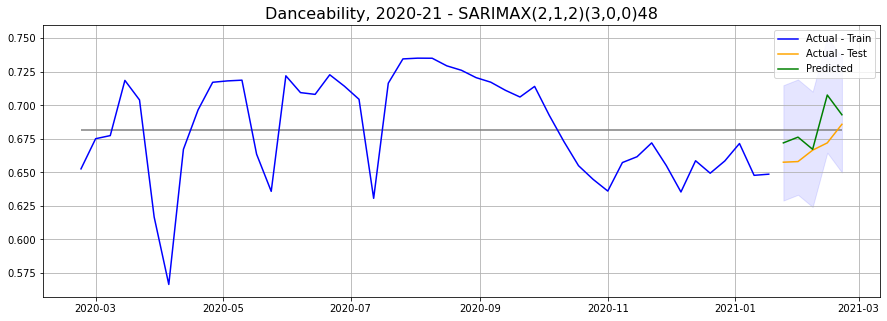

In [25]:
sarima_predict_plot_exog(italy_rw_20_21[7:], 'danceability', 2020, exog_var=exog_danceability, title='Danceability, 2020-21 - SARIMAX(2,1,2)(3,0,0)48', order=(2,1,2), d=1, seasonal_order=(3,0,0,48))

2020-07-05 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-21 00:00:00
Danceability train RMSE (2021) - SARIMA((2, 1, 2)): 0.023303570497268753
Danceability test RMSE (2021) - SARIMA((2, 1, 2)): 0.019889764859564663


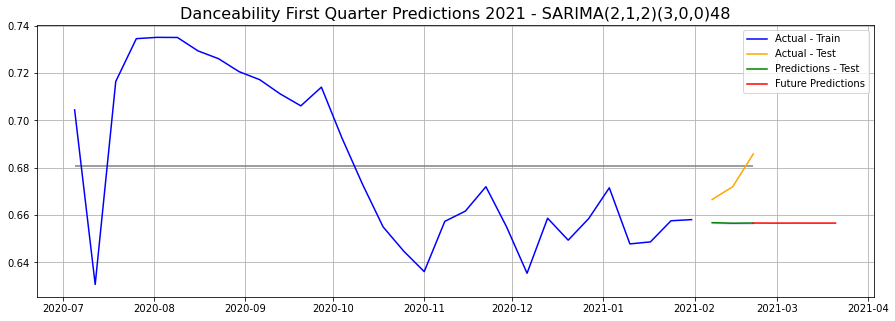

<Figure size 432x288 with 0 Axes>

In [26]:
sarima_predict_plot_seasonal(italy_rw_20_21[26:], 'danceability', 2021, title='Danceability First Quarter Predictions 2021 - SARIMA(2,1,2)(3,0,0)48', order=(2,1,2), d=1, seasonal_order=(3,0,0,48))
plt.savefig('dance_forecast')

2020-07-05 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-21 00:00:00
Energy train RMSE (2021) - SARIMA((2, 1, 0)): 0.027809025966548672
Energy test RMSE (2021) - SARIMA((2, 1, 0)): 0.04877529131025848


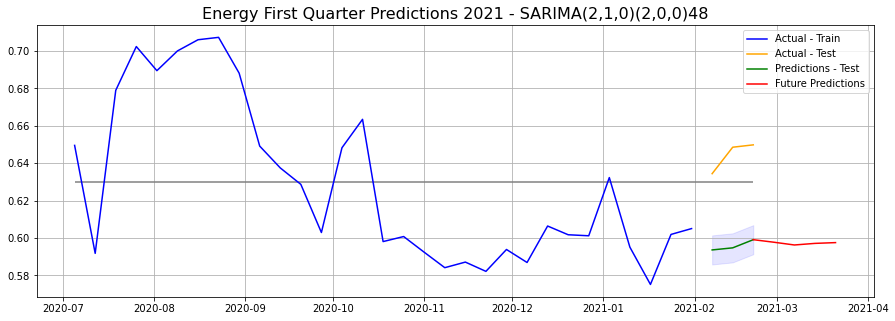

In [176]:
sarima_predict_plot_seasonal(italy_rw_20_21[26:], 'energy', 2021, title='Energy First Quarter Predictions 2021 - SARIMA(2,1,0)(2,0,0)48', order=(2,1,0), d=1, seasonal_order=(2,0,0,48))

2020-07-05 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-21 00:00:00
Mode train RMSE (2021) - SARIMA((4, 1, 0)): 0.03635786130612516
Mode test RMSE (2021) - SARIMA((4, 1, 0)): 0.05011440288671652


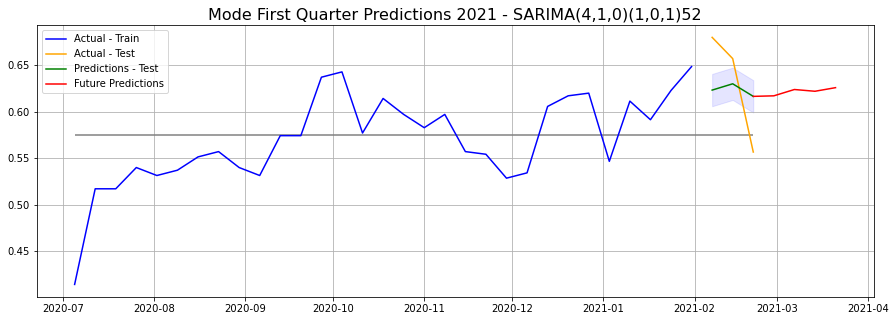

In [177]:
sarima_predict_plot_seasonal(italy_rw_20_21[26:], 'mode', 2021, title='Mode First Quarter Predictions 2021 - SARIMA(4,1,0)(1,0,1)52', order=(4,1,0), d=1, seasonal_order=(1,0,1,52))

2020-07-05 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-21 00:00:00
Acousticness train RMSE (2021) - SARIMA((1, 1, 1)): 0.04393604475217615
Acousticness test RMSE (2021) - SARIMA((1, 1, 1)): 0.06412326955742402


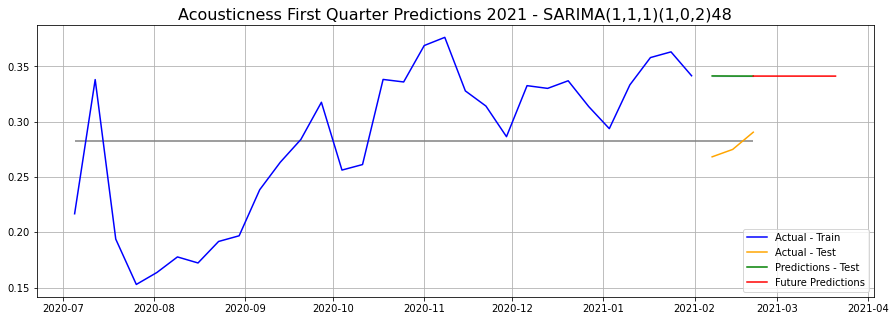

In [178]:
sarima_predict_plot_seasonal(italy_rw_20_21[26:], 'acousticness', 2021, title='Acousticness First Quarter Predictions 2021 - SARIMA(1,1,1)(1,0,2)48', order=(1,1,1), d=1, seasonal_order=(1,0,2,48))

2020-07-05 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-21 00:00:00
Valence train RMSE (2021) - SARIMA((0, 1, 0)): 0.026554037677725607
Valence test RMSE (2021) - SARIMA((0, 1, 0)): 0.031224502004710247


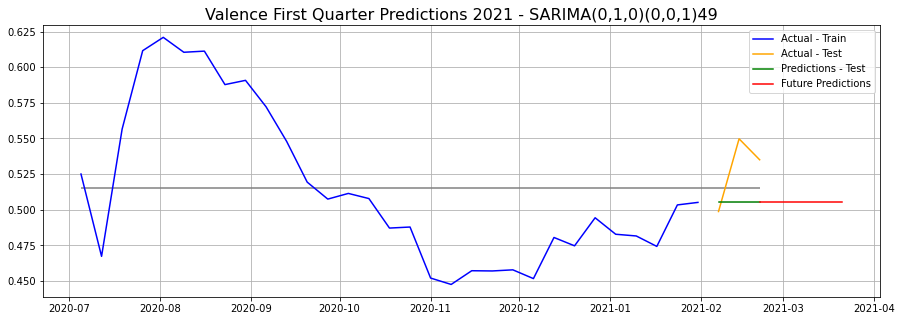

In [179]:
sarima_predict_plot_seasonal(italy_rw_20_21[26:], 'valence', 2021, title='Valence First Quarter Predictions 2021 - SARIMA(0,1,0)(0,0,1)49', order=(0,1,0), d=1, seasonal_order=(0,0,1,49))

In [100]:
it_rw_19.head()

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2019-01-06,25.5,0.668231,0.680805,4.580000,-6.478111,0.514286,0.113994,0.288621,0.100187,0.153183,0.466531,126.070511,219218.028571,3.885714
2019-01-13,25.5,0.673357,0.677388,4.211429,-6.407583,0.522857,0.099184,0.289861,0.089097,0.150668,0.508239,124.737909,219014.757143,3.925714
2019-01-20,25.5,0.697184,0.680720,5.096000,-6.475476,0.544000,0.102436,0.295106,0.048045,0.152822,0.538452,125.569356,207967.236000,3.896000
2019-01-27,25.5,0.682600,0.663323,4.948571,-6.269969,0.585714,0.084115,0.317731,0.021775,0.158729,0.509068,125.502334,203952.851429,3.888571
2019-02-03,25.5,0.675657,0.647151,4.717143,-6.458660,0.591429,0.092774,0.307546,0.033195,0.164685,0.462844,122.058834,199156.402857,3.882857


In [101]:
it_rw_19_arima_mod = basic_arima_model(it_rw_19[0:20], 'mode', 2019, order=(0,1,0), d=1)

2019-01-06 00:00:00
2019-05-05 00:00:00
2019-05-12 00:00:00
2019-05-19 00:00:00
Mode train RMSE (2019) - ARIMA((0, 1, 0)): 0.04771740575196045
Mode test RMSE (2019) - ARIMA((0, 1, 0)): 0.05456208713362218


In [102]:
it_rw_19_arima_mod.forecast(3)

(array([0.45983193, 0.45680672, 0.45378151]),
 array([0.04771741, 0.0674826 , 0.08264897]),
 array([[0.36630754, 0.55335633],
        [0.32454325, 0.58907019],
        [0.2917925 , 0.61577052]]))

In [103]:
it_rw_19_arima_mod.predict('2019-05-05', '2019-06-26', typ='levels')

2019-05-05    0.379832
2019-05-12    0.459832
2019-05-19    0.456807
2019-05-26    0.453782
2019-06-02    0.450756
2019-06-09    0.447731
2019-06-16    0.444706
2019-06-23    0.441681
2019-06-30    0.438655
Freq: W-SUN, dtype: float64

d = 1
order = (0, 1, 0)
Mode train RMSE (2019) - ARIMA((0, 1, 0)): 0.04771740575196045
Mode test RMSE (2019) - ARIMA((0, 1, 0)): 0.05456208713362218


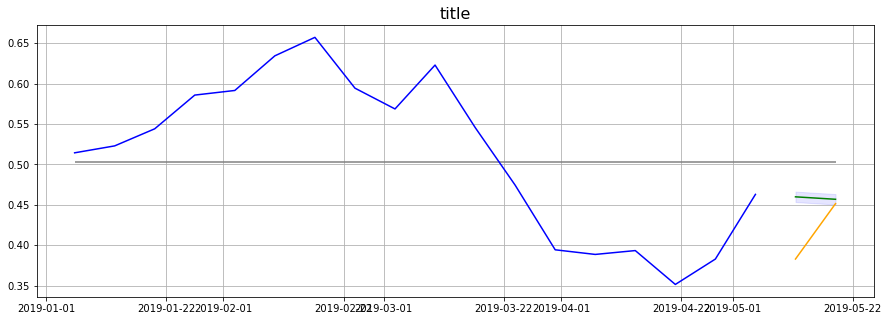

In [104]:
arima_predict_plot(it_rw_19[0:20], 'mode', 2019, order=(0,1,0), d=1)

**Running models on first 13 rows (first quarter of each year):**

In [105]:
it_rw_17[0:13]

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,
2017-01-01,25.5,0.604800,0.591096,5.840000,-9.008200,0.600000,0.081670,0.303003,0.061578,0.172262,0.466054,115.511720,257468.600000,3.860000
2017-01-08,25.5,0.592829,0.596115,5.602857,-8.670323,0.717143,0.091595,0.355359,0.182476,0.175617,0.390494,118.564109,279987.502857,3.908571
2017-01-15,25.5,0.590561,0.584263,5.025714,-8.433451,0.625714,0.091436,0.340648,0.141121,0.204428,0.402156,118.157554,252121.394286,3.985714
2017-01-22,25.5,0.570760,0.618591,4.497143,-7.809969,0.588571,0.093505,0.348782,0.111421,0.163771,0.396994,119.730454,240012.791429,3.934286
2017-01-29,25.5,0.549560,0.672368,4.888571,-6.910569,0.705714,0.087994,0.302466,0.069887,0.175481,0.469083,122.640960,230365.305714,3.954286
2017-02-05,25.5,0.528654,0.609817,4.774286,-8.390640,0.580000,0.087075,0.382444,0.126314,0.202379,0.414801,124.270766,235210.294286,3.888571
2017-02-12,25.5,0.569857,0.643407,5.371429,-7.381077,0.505714,0.091075,0.320187,0.078179,0.204524,0.402593,125.138609,232336.080000,3.971429
2017-02-19,25.5,0.562309,0.658000,5.625714,-6.435443,0.691429,0.071367,0.260432,0.027138,0.198505,0.445958,123.969780,225473.771429,3.962857
2017-02-26,25.5,0.585766,0.641339,5.388571,-6.807049,0.634286,0.080548,0.263534,0.031472,0.194500,0.445379,122.762683,222024.417143,3.971429


In [106]:
arima_predict_plot(it_rw_17[0:13], 'mode', 2017, title="Mode First Quarter 2017", )

NameError: name 'ndiff_df' is not defined

2017-01-01 00:00:00
2017-04-16 00:00:00
2017-04-23 00:00:00
2017-04-30 00:00:00
Mode train RMSE (2017) - SARIMA((4, 1, 2)): 0.05398060498623584
Mode test RMSE (2017) - SARIMA((4, 1, 2)): 0.17054252065575126


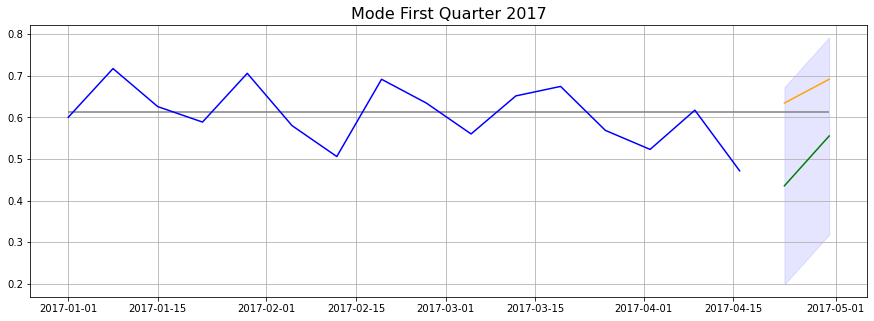

In [107]:
sarima_predict_plot_seasonal(it_rw_17[0:18], 'mode', 2017, title="Mode First Quarter 2017", order=(4,1,2), d=1, seasonal_order=(1,0,1,52))

In [108]:
italy_20_21

,Position,Track Name,Artist,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,
2020-01-01,1,Che vita meravigliosa,Diodato,it,38IMwP32I50uftvKOoDD09,0.503,0.669,11,-7.760,0,0.0385,0.0238,0.000006,0.1420,0.381,95.047,212253,4
2020-01-01,2,Falling,Trevor Daniel,it,4TnjEaWOeW0eKTKIEvJyCa,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382,4
2020-01-01,3,Vorrei Dirti,Anto Paga,it,4zpAnyVfs0EQbD6VSZ6Dgs,0.431,0.377,11,-7.802,1,0.0322,0.7490,0.000000,0.1540,0.322,173.563,146551,4
2020-01-01,4,Natale Reggaeton,RDS Christmas Band,it,4pvtxWJNji6VBwJ9FiI9Ba,0.782,0.526,4,-7.416,1,0.0543,0.1650,0.000000,0.1280,0.404,109.968,169091,4
2020-01-01,5,blun7 a swishland,tha Supreme,it,7HwvPmK74MBRDhCIyMXReP,0.692,0.792,7,-5.984,1,0.2450,0.1300,0.000000,0.2550,0.566,129.883,167760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-13,46,MIA,Lortex,it,1SIl1FBbHmGa4PmJu5q6Lm,0.536,0.684,9,-6.862,1,0.0438,0.0726,0.000000,0.1150,0.383,91.370,174725,4
2021-02-13,47,Persiani,Nuvolari,it,5tsSm3fPfQnxVUfoC5GJzy,0.507,0.270,9,-9.305,1,0.0324,0.7910,0.000000,0.0702,0.153,79.679,197000,4
2021-02-13,48,Make a Pose,Don Xhoni,it,6tdNBnCfRm13KmcK8JWtGs,0.611,0.822,7,-4.909,1,0.2620,0.2760,0.000000,0.1830,0.790,144.160,88750,4


2020-01-05 00:00:00
2021-01-03 00:00:00
2021-01-10 00:00:00
2021-02-14 00:00:00
Danceability train RMSE (2021) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.017138929480163205
Danceability test RMSE (2021) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.021410730521976565


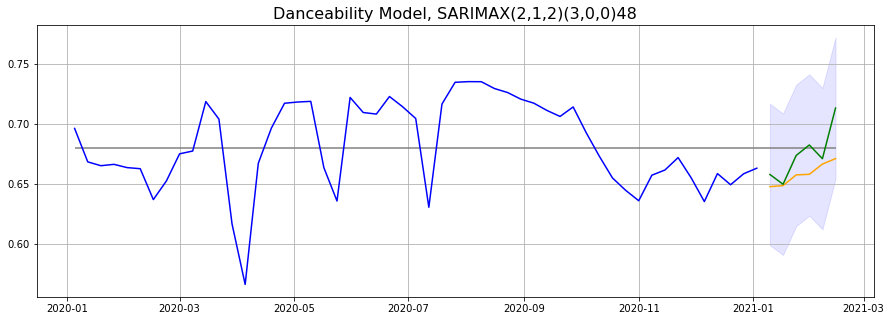

In [113]:
sarima_predict_plot_exog(it_rw_20_21, 'danceability', 2021, exog_var=exog_danceability, title="Danceability Model, SARIMAX(2,1,2)(3,0,0)48", order=(2,1,2), d=1, seasonal_order=(3,0,0,48))

2020-01-05 00:00:00
2020-11-29 00:00:00
2020-12-06 00:00:00
2021-01-03 00:00:00
Danceability train RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.01770276703046404
Danceability test RMSE (2020) - SARIMAX((3, 0, 0, 48)) w/ exogenous variables: 0.016792773546114213


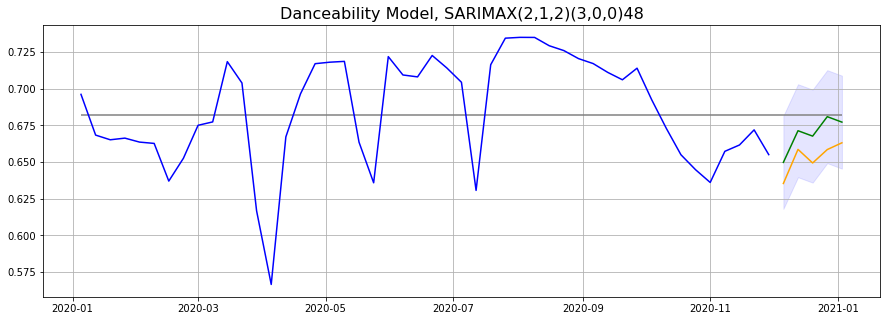

In [114]:
sarima_predict_plot_exog(it_rw_20, 'danceability', 2020, exog_var=exog_danceability, title="Danceability Model, SARIMAX(2,1,2)(3,0,0)48", order=(2,1,2), d=1, seasonal_order=(3,0,0,48))

# Running models Feb 2020 - Feb 2021 